#There are two major challenges that financial institutions face in this context:

#Big data: Banks and other financial institutions had to deal with massive amounts of data even before the term “big data” was coined; however, the amount of data that has to be processed during single analytics tasks has increased tremendously over time, demanding both increased computing power and ever-larger memory and storage capacities.
#Real-time economy: In the past, decision makers could rely on structured, regular planning as well as decision and (risk) management processes, whereas they today face the need to take care of these functions in real time; several tasks that have been taken care of in the past via overnight batch runs in the back office have now been moved to the front office and are executed in real time.

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

# Set plotting style and configurations
plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'

# Define the correct path to the CSV file
file_path = 'fin-tech/csv/tr_eikon_eod_data.csv'

# Load the data from the CSV file
try:
    data = pd.read_csv(file_path)
    # Display the first few rows of the loaded data
    print(data.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the file path and try again.")

# Ensure inline plotting in Jupyter Notebooks
%matplotlib inline



         Date     AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX  \
0  2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99   
1  2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52   
2  2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14   
3  2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69   
4  2010-01-08  30.282827  30.660   20.83  133.52  174.31  114.57  1144.98   

    .VIX    EUR=     XAU=    GDX     GLD  
0  20.04  1.4411  1120.00  47.71  109.80  
1  19.35  1.4368  1118.65  48.17  109.70  
2  19.16  1.4412  1138.50  49.34  111.51  
3  19.06  1.4318  1131.90  49.10  110.82  
4  18.13  1.4412  1136.10  49.84  111.37  


In [18]:
# Load the data from the CSV file
try:
    raw = pd.read_csv(file_path, index_col=0, parse_dates=True)
    # Display information about the DataFrame
    print(raw.info())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the file path and try again.")

# Select the financial time series for the stock of Apple, Inc. (AAPL.O)
symbol = 'AAPL.O'
try:
    data = pd.DataFrame(raw[symbol]).dropna()
    print(data.head())
except KeyError:
    print(f"The symbol '{symbol}' was not found in the data.")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB
None
               AAPL.O
Date                 
2010-01-04  30.572827
2010-01-05  30.625684
2010-01-06  30.138541
2010-01-07  30.082827
2010-01-08  30.282827


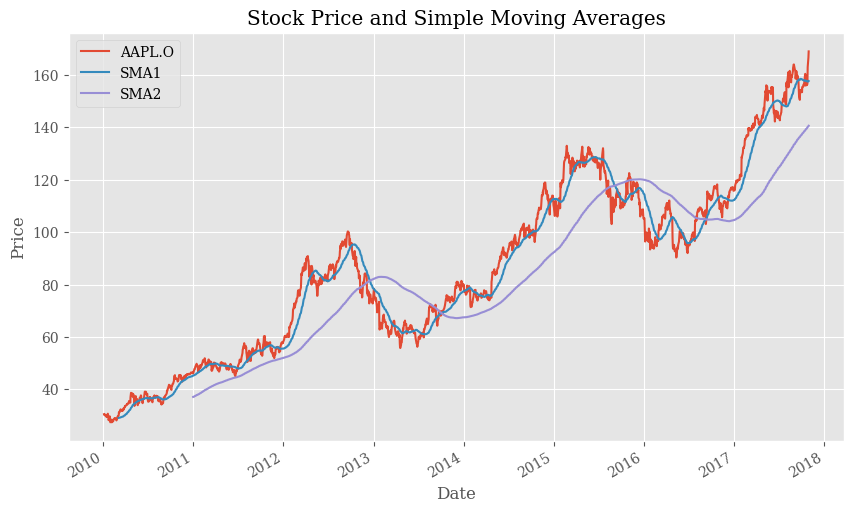

In [20]:
# Continue from the existing imports and data loading steps
# Define the rolling window sizes
SMA1 = 42
SMA2 = 252

# Calculate the SMA values
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()

# Plot the data along with the SMA values
data.plot(figsize=(10, 6))
plt.title('Stock Price and Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


#Fourth, the derivation of the positions. The trading rules are:
#• Go long (= +1) when the shorter SMA is above the longer SMA.
#• Go short (= -1) when the shorter SMA is below the longer SMA.4

In [24]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Derive the positions based on the trading rules
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

# Display the last few rows of the DataFrame to check the positions
print(data.tail())


            AAPL.O        SMA1        SMA2  Position
Date                                                
2017-10-25  156.41  157.610952  139.862520         1
2017-10-26  157.41  157.514286  140.028472         1
2017-10-27  163.05  157.517619  140.221210         1
2017-10-30  166.72  157.597857  140.431528         1
2017-10-31  169.04  157.717857  140.651766         1


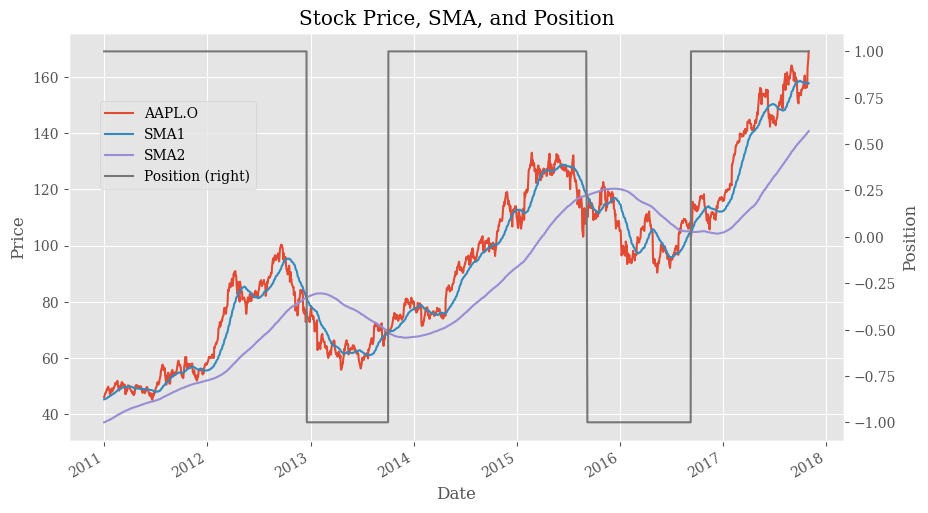

In [26]:
# Plot the data with 'Position' on a secondary y-axis
ax = data[['AAPL.O', 'SMA1', 'SMA2', 'Position']].plot(secondary_y='Position', figsize=(10, 6))
ax.set_title('Stock Price, SMA, and Position')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.right_ax.set_ylabel('Position')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

plt.show()


#implementing the algorithmic trading strategy—is
#superior compared to the benchmark case of simply going long on the Apple stock
#over the whole period. Given that the strategy leads to two periods only during which
#the Apple stock should be shorted, differences in the performance can only result
#from these two periods.


#To implement vectorized backtesting, first, calculate the log returns of the Apple stock. Next, multiply the log returns by the corresponding position values (either +1 or -1) to reflect the returns for long and short positions. This step allows the calculation of the strategy's returns by earning the stock's return in long positions and the negative return in short positions. Finally, sum the log returns for both the Apple stock and the trading strategy, and apply the exponential function to these cumulative log returns to obtain the performance values of the stock and the strategy. Here’s the complete code:

In [32]:
# Calculate the log returns
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1)) #Calculates the log returns of the Apple stock (i.e., the benchmark investment).

# Calculate strategy returns based on positions
data['Strategy'] = data['Position'].shift(1) * data['Returns'] #Multiplies the position values, shifted by one day, by the log returns of the Apple stock; the shift is required to avoid a foresight bias.

# Display the first few rows of the DataFrame, rounded to 4 decimal places
print(data.round(4).head())


             AAPL.O     SMA1     SMA2  Position  Returns  Strategy
Date                                                              
2010-12-31  46.0800  45.2810  37.1207         1      NaN       NaN
2011-01-03  47.0814  45.3497  37.1862         1   0.0215    0.0215
2011-01-04  47.3271  45.4126  37.2525         1   0.0052    0.0052
2011-01-05  47.7142  45.4661  37.3223         1   0.0081    0.0081
2011-01-06  47.6757  45.5226  37.3921         1  -0.0008   -0.0008


In [34]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Calculate the exponential of the cumulative sum of returns and strategy returns
cumulative_returns = np.exp(data[['Returns', 'Strategy']].sum()) #Sums up the log returns for the strategy and the benchmark investment and calculates the exponential value to arrive at the absolute performance.
print(cumulative_returns)

# Calculate the annualized standard deviation of returns and strategy returns
annualized_std = data[['Returns', 'Strategy']].std() * (252 ** 0.5) #Calculates the annualized volatility for the strategy and the benchmark investment.
print(annualized_std)


Returns     3.668406
Strategy    5.306802
dtype: float64
Returns     0.252947
Strategy    0.252763
dtype: float64


#The numbers indicate that the algorithmic trading strategy significantly outperforms the benchmark investment of passively holding Apple stock, with cumulative returns of approximately 5.306 compared to the stock's 3.668. Despite having similar annualized volatility values—0.252763 for the strategy and 0.252947 for the stock—the strategy's superior returns translate to better performance on a risk-adjusted basis. This demonstrates that the trading strategy not only provides higher returns but also maintains the same level of risk, thereby offering a more efficient investment approach.

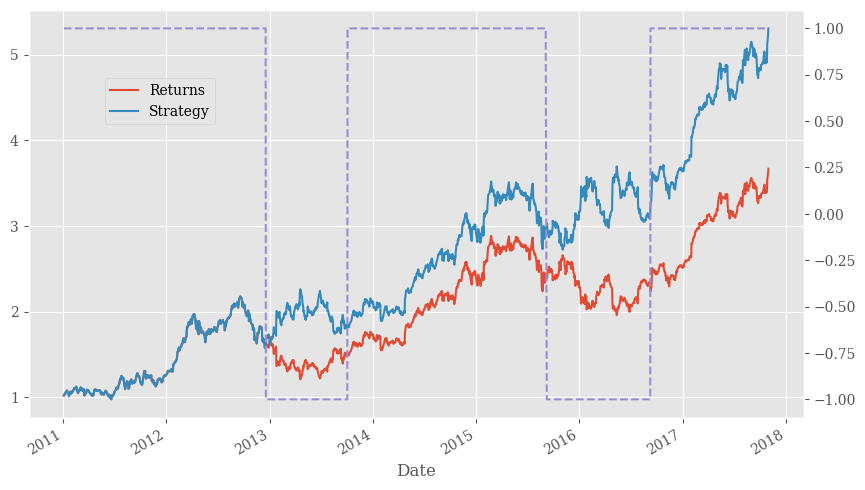

In [38]:
# Plot the cumulative returns for both the stock and the strategy
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

# Plot the positions on a secondary y-axis
data['Position'].plot(ax=ax, secondary_y='Position', style='--')

# Adjust the legend position
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))


#The vectorized backtesting approach simplifies several aspects of trading, such as excluding transaction costs (fixed fees, bid-ask spreads, lending costs) and assuming all trades occur at end-of-day closing prices. While this may be reasonable for strategies involving few trades over multiple years, a more realistic backtesting model would incorporate these elements along with market microstructure factors to better simulate actual trading conditions and account for potential slippage and execution challenges.

#A natural question is whether the chosen parameters SMA1=42 and SMA2=252 are optimal. Investors typically seek to maximize returns, prompting the use of a brute force approach to identify the best parameters. This involves repeating the vectorized backtesting procedure for various parameter combinations, recording the results, and ranking them to find the combination that yields the highest return over the relevant period. This method helps in optimizing the strategy by systematically evaluating the performance of different SMA values.

In [44]:
from itertools import product

# Define the range of SMA values for optimization
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

# Initialize a list to store the results
results_list = []

# Iterate over all combinations of SMA1 and SMA2
for SMA1, SMA2 in product(sma1, sma2):
    # Create a DataFrame for the symbol data
    data = pd.DataFrame(raw[symbol])
    
    # Drop NaN values
    data.dropna(inplace=True)
    
    # Calculate log returns
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    
    # Calculate SMA values
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    
    # Drop NaN values after SMA calculation
    data.dropna(inplace=True)
    
    # Derive positions based on SMA crossover
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    
    # Calculate strategy returns
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    
    # Drop NaN values after position calculation
    data.dropna(inplace=True)
    
    # Calculate performance metrics
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    
    # Record the results in a dictionary
    results_list.append({
        'SMA1': SMA1,
        'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns']
    })

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# Display information about the results DataFrame
print(results.info())

# Sort the results by 'OUT' in descending order and display the top 7
top_results = results.sort_values('OUT', ascending=False).head(7)
print(top_results)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB
None
     SMA1  SMA2    MARKET  STRATEGY       OUT
56     40   190  4.246631  6.552273  2.305642
39     32   240  3.694406  5.989309  2.294903
59     40   220  3.853897  5.976137  2.122240
46     36   200  3.721010  5.834923  2.113913
55     40   180  4.177810  6.262625  2.084815
70     44   220  3.853897  5.908175  2.054279
101    56   200  3.721010  5.770906  2.049896


#According to the brute force-based optimization, the optimal parameters are SMA1=40 and SMA2=190, resulting in an outperformance of around 230 percentage points. However, this result is highly dependent on the specific data set and susceptible to overfitting, where parameters are tailored to perform exceptionally well on the training data but poorly on new, unseen data. A more rigorous approach would involve splitting the data into in-sample (training) and out-of-sample (testing) sets, optimizing the parameters on the training set, and validating the performance on the testing set to mitigate overfitting and ensure robustness.

#The previous section demonstrated that vectorized backtesting of an algorithmic trading strategy based on historical end-of-day prices for Apple stock outperforms simply holding the stock over the same period. This finding contradicts the random walk hypothesis (RWH), which asserts that financial market prices follow a random walk or arithmetic Brownian motion without drift, implying that the best predictor of tomorrow's price is today's price. The RWH aligns with the efficient markets hypothesis (EMH), which suggests that market prices reflect all available information. Different degrees of market efficiency—weak, semi-strong, and strong—define the scope of "all available information." This concept can be formalized using information sets in theory or data sets in practice, indicating that predictive approaches should not yield outperformance if the RWH holds true.

In [50]:
# Define the symbol for the S&P 500 stock index
symbol = '.SPX'

# Create a DataFrame for the symbol data
data = pd.DataFrame(raw[symbol])

# Define the number of lags
lags = 5

# Create lagged versions of the data
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data[symbol].shift(lag)

# Display the first 7 rows of the DataFrame
print(data.head(7))


               .SPX    lag_1    lag_2    lag_3    lag_4    lag_5
Date                                                            
2010-01-04  1132.99      NaN      NaN      NaN      NaN      NaN
2010-01-05  1136.52  1132.99      NaN      NaN      NaN      NaN
2010-01-06  1137.14  1136.52  1132.99      NaN      NaN      NaN
2010-01-07  1141.69  1137.14  1136.52  1132.99      NaN      NaN
2010-01-08  1144.98  1141.69  1137.14  1136.52  1132.99      NaN
2010-01-11  1146.98  1144.98  1141.69  1137.14  1136.52  1132.99
2010-01-12  1136.22  1146.98  1144.98  1141.69  1137.14  1136.52


OLS regression parameters: [ 0.70815452  0.96229839  0.03872003 -0.04870017  0.01646524  0.03127609]


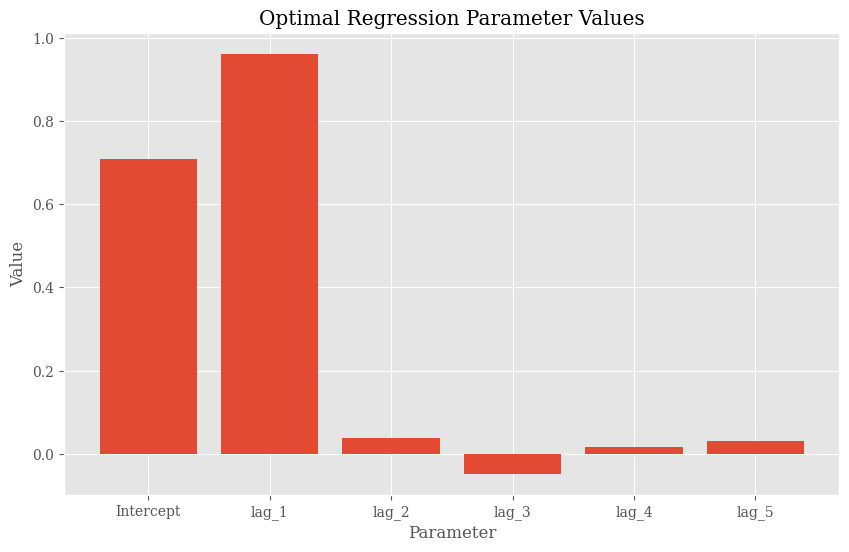

In [52]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Prepare the matrix X and vector y for OLS regression
X = np.c_[np.ones(data.shape[0]), data[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].values]
y = data[symbol].values

# Calculate the OLS regression parameters (beta)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the OLS regression parameters
print("OLS regression parameters:", beta)

# Visualize the optimal regression parameter values
plt.figure(figsize=(10, 6))
plt.bar(['Intercept', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'], beta)
plt.title('Optimal Regression Parameter Values')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.show()

OLS regression parameters: [ 0.70815452  0.96229839  0.03872003 -0.04870017  0.01646524  0.03127609]


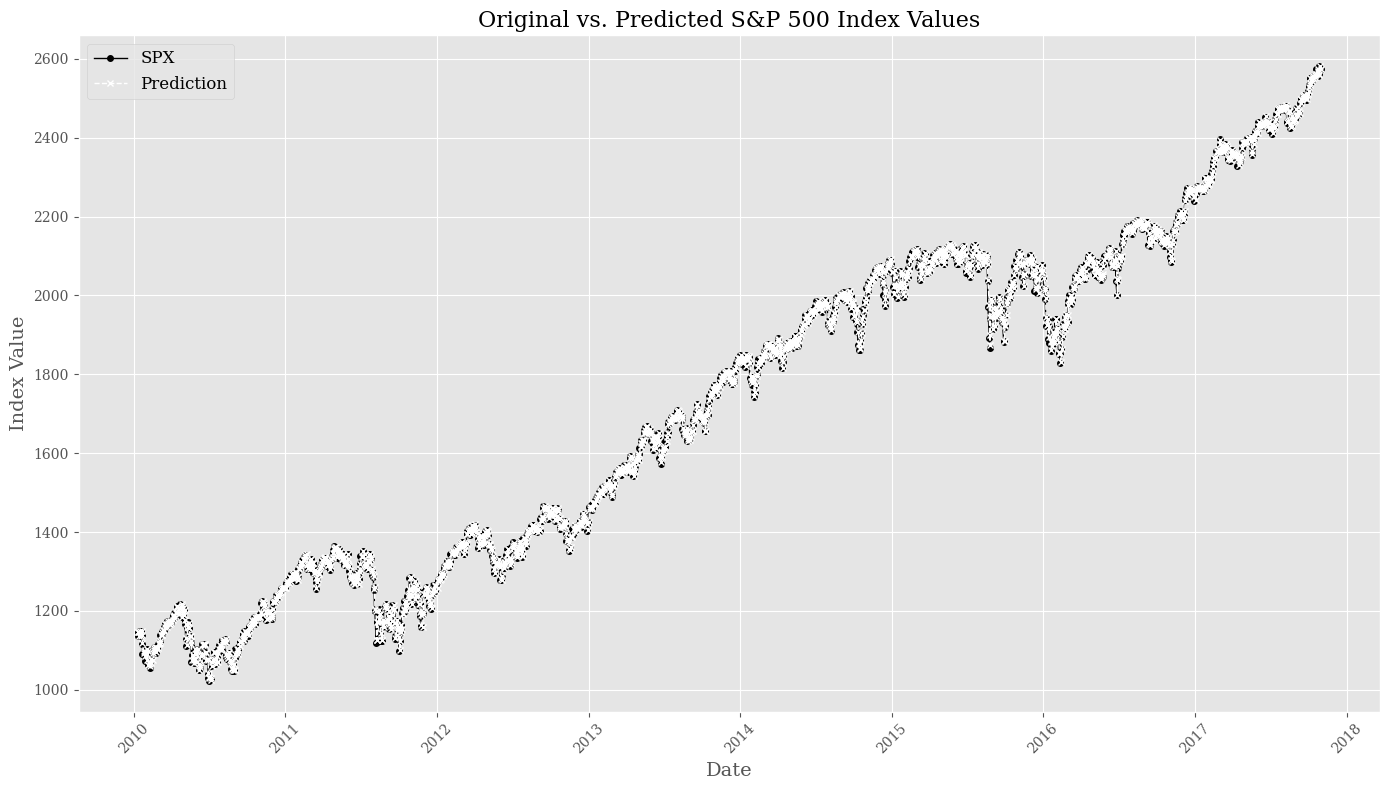

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbol for the S&P 500 stock index
symbol = '.SPX'

# Create a DataFrame for the symbol data
data = pd.DataFrame(raw[symbol])

# Define the number of lags
lags = 5

# Create lagged versions of the data
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data[symbol].shift(lag)

# Drop rows with NaN values
data.dropna(inplace=True)

# Prepare the matrix X and vector y for OLS regression
X = np.c_[np.ones(data.shape[0]), data[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].values]
y = data[symbol].values

# Calculate the OLS regression parameters (beta)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the OLS regression parameters
print("OLS regression parameters:", beta)

# Make predictions using the OLS regression parameters
data['Predicted'] = X @ beta

# Bar plot for original and predicted values
width = 0.4  # Width of the bars
data_index = np.arange(len(data.index))  # The label locations


# Line plot for original and predicted values with markers
plt.figure(figsize=(14, 8))
plt.plot(data.index, data[symbol], label='SPX', color='black', marker='o', markersize=4, linestyle='-', linewidth=1)
plt.plot(data.index, data['Predicted'], label='Prediction', color='white', marker='x', markersize=4, linestyle='--', linewidth=1)
plt.title('Original vs. Predicted S&P 500 Index Values', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Index Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





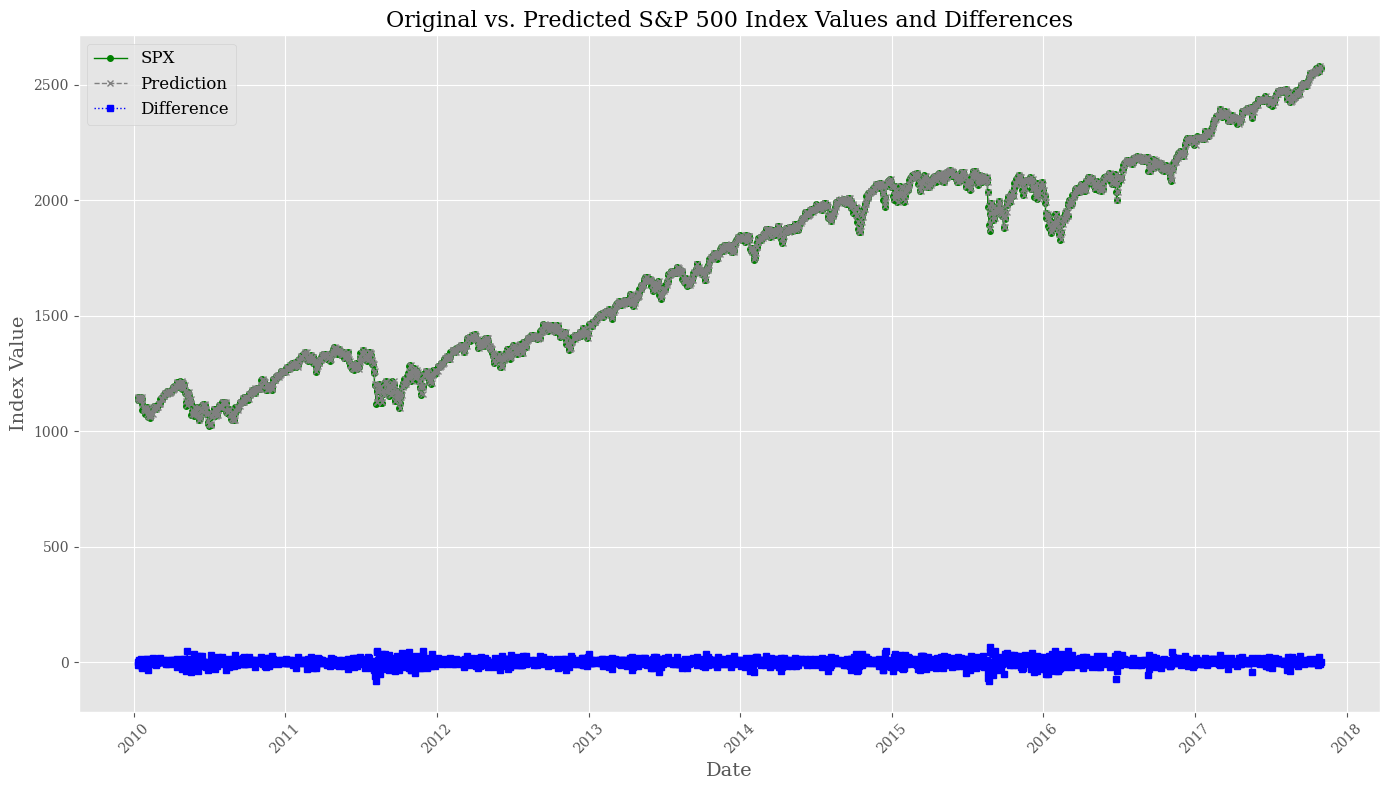

In [55]:
# Calculate the differences between the original and predicted values
data['Difference'] = data[symbol] - data['Predicted']

# Plot the original values, predicted values, and their differences
plt.figure(figsize=(14, 8))

# Original and predicted values
plt.plot(data.index, data[symbol], label='SPX', color='green', marker='o', markersize=4, linestyle='-', linewidth=1)
plt.plot(data.index, data['Predicted'], label='Prediction', color='grey', marker='x', markersize=4, linestyle='--', linewidth=1)

# Differences
plt.plot(data.index, data['Difference'], label='Difference', color='blue', marker='s', markersize=4, linestyle=':', linewidth=1)

plt.title('Original vs. Predicted S&P 500 Index Values and Differences', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Index Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#The brief analysis in this section provides some support for both the Random Walk Hypothesis (RWH) and the Efficient Markets Hypothesis (EMH). Although the analysis was conducted on a single stock index with a specific parameterization, it can be expanded to include multiple financial instruments across various asset classes and different lag values. Generally, the results tend to be qualitatively similar, as the RWH and EMH have substantial empirical backing. Consequently, any algorithmic trading strategy must demonstrate its efficacy by proving that the RWH does not universally apply, which is indeed a challenging feat.

#This section applies linear OLS regression to predict market movement directions based on historical log returns, using two lagged features: lag_1 and lag_2. Log returns, being stationary, are suitable for statistical and ML algorithms. The lagged log returns may hold predictive information about future returns, supporting hypotheses like mean reversion (after two downward movements, an upward movement is more likely) or momentum (continued downward movement). By formalizing these hypotheses through regression techniques, we use lag_1 and lag_2 features to model and predict future market movements, leveraging the patterns observed in past log returns.

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')
              EUR=   returns  direction
Date                                   
2010-01-05  1.4368 -0.002988         -1
2010-01-06  1.4412  0.003058          1
2010-01-07  1.4318 -0.006544         -1
2010-01-08  1.4412  0.006544          1
2010-01-11  1.4513  0.006984          1


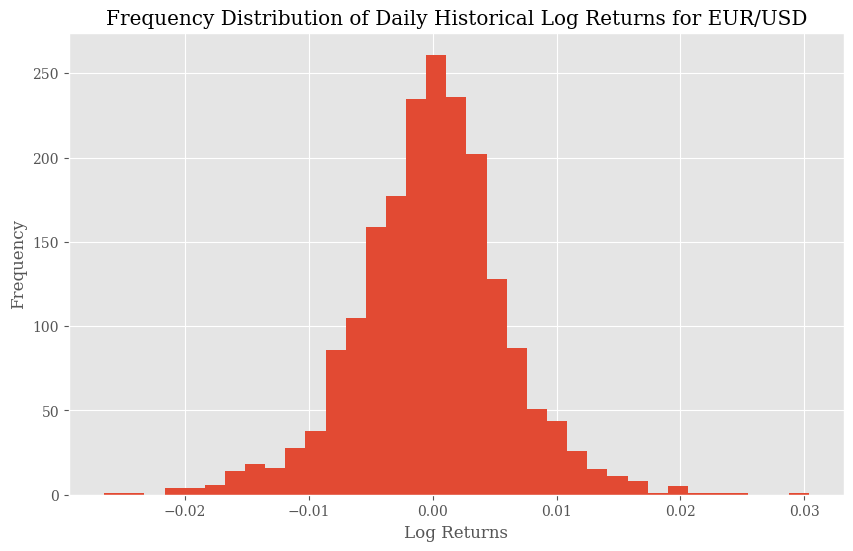

In [62]:

# Import the data
raw = pd.read_csv('fin-tech/csv/tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

# Display the columns to verify the data
print(raw.columns)

# Select the EUR/USD exchange rate symbol
symbol = 'EUR='

# Create a DataFrame for the selected symbol
data = pd.DataFrame(raw[symbol])

# Calculate the log returns
data['returns'] = np.log(data / data.shift(1))

# Drop rows with NaN values
data.dropna(inplace=True)

# Create the direction column based on the sign of the returns
data['direction'] = np.sign(data['returns']).astype(int)

# Display the first few rows of the DataFrame
print(data.head())

# Plot the frequency distribution of the daily historical log returns
data['returns'].hist(bins=35, figsize=(10, 6))
plt.title('Frequency Distribution of Daily Historical Log Returns for EUR/USD')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()


              EUR=   returns  direction     lag_1     lag_2
Date                                                       
2010-01-06  1.4412  0.003058          1       NaN       NaN
2010-01-07  1.4318 -0.006544         -1  0.003058       NaN
2010-01-08  1.4412  0.006544          1 -0.006544  0.003058
2010-01-11  1.4513  0.006984          1  0.006544 -0.006544
2010-01-12  1.4494 -0.001310         -1  0.006984  0.006544


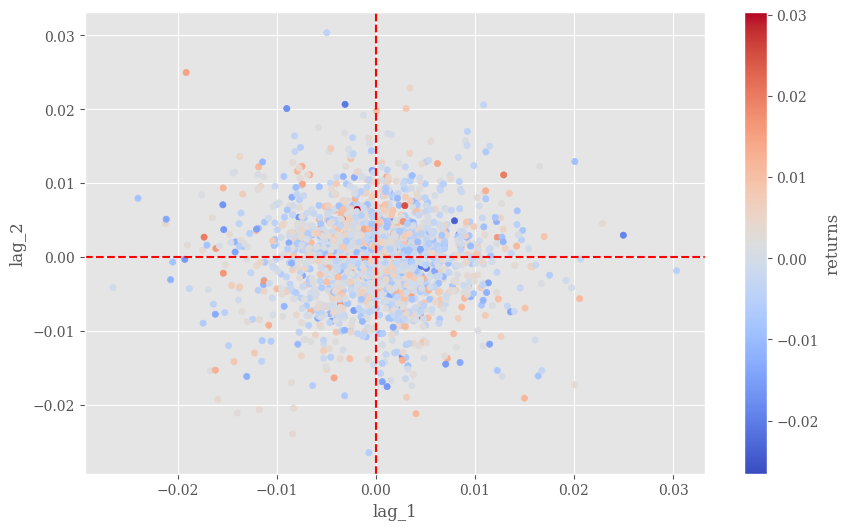

In [64]:
# Ensure the 'returns' column is created
data['returns'] = np.log(data[symbol] / data[symbol].shift(1))
data.dropna(inplace=True)

# Define the function to create lagged features
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

create_lags(data)
print(data.head())

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Plot the scatter plot with lagged features and returns
data.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')
plt.show()


#Regression
#With the data set completed, linear OLS regression can be applied to learn about any
#potential (linear) relationships, to predict market movement based on the features,
#and to backtest a trading strategy based on the predictions. Two basic approaches are
#available: using the log returns or only the direction data as the dependent variable
#during the regression. In any case, predictions are real-valued and therefore trans‐
#formed to either +1 or -1 to only work with the direction of the prediction:

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming the data has already been loaded and processed
# Ensure the 'returns' column is created
data['returns'] = np.log(data[symbol] / data[symbol].shift(1))
data.dropna(inplace=True)

# Create the direction column based on the sign of the returns
data['direction'] = np.sign(data['returns']).astype(int)

# Define the function to create lagged features
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

create_lags(data)

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the lagged returns to predict future returns and store predictions
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])

# Fit the model on the lagged returns to predict the direction and store predictions
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])

# Display the first few rows of the predictions
print(data[['pos_ols_1', 'pos_ols_2']].head())

# Transform real-valued predictions to directional values (+1, -1)
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

# Count the occurrences of each directional value for pos_ols_1
print(data['pos_ols_1'].value_counts())

# Count the occurrences of each directional value for pos_ols_2
print(data['pos_ols_2'].value_counts())

# Count the number of times the direction changes for pos_ols_1
print((data['pos_ols_1'].diff() != 0).sum())

# Count the number of times the direction changes for pos_ols_2
print((data['pos_ols_2'].diff() != 0).sum())


            pos_ols_1  pos_ols_2
Date                            
2010-01-13   0.000005   0.006520
2010-01-14  -0.000148   0.004908
2010-01-15  -0.000087   0.010917
2010-01-19   0.000023   0.058515
2010-01-20  -0.000124   0.055878
pos_ols_1
-1    1615
 1     350
Name: count, dtype: int64
pos_ols_2
 1    1234
-1     731
Name: count, dtype: int64
678
786


#Equipped with the directional prediction, vectorized backtesting can be applied to
#judge the performance of the resulting trading strategies. At this stage, the analysis is
#based on a number of simplifying assumptions, such as “zero transaction costs” and
#the usage of the same data set for both training and testing. Under these assumptions,
#however, both regression-based strategies outperform the benchmark passive invest‐
#ment, while only the strategy trained on the direction of the market shows a positive
#overall performance 

returns        0.803367
strat_ols_1    1.321295
strat_ols_2    1.394272
dtype: float64
True     985
False    980
Name: count, dtype: int64
True     1020
False     945
Name: count, dtype: int64


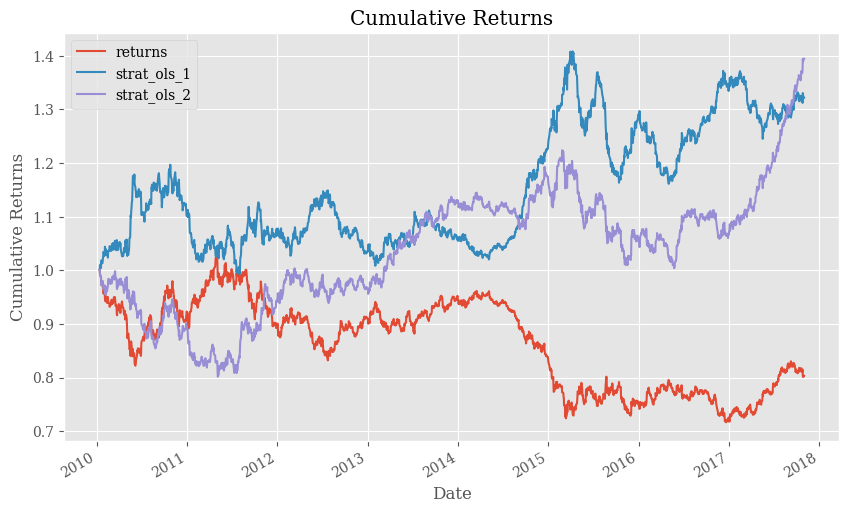

In [72]:
# Calculate strategy returns by multiplying the position with the returns
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

# Sum the returns and apply the exponential function to get the cumulative performance
performance = data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)
print(performance)

# Compare the predicted direction with the actual direction for pos_ols_1
accuracy_ols_1 = (data['direction'] == data['pos_ols_1']).value_counts()
print(accuracy_ols_1)

# Compare the predicted direction with the actual direction for pos_ols_2
accuracy_ols_2 = (data['direction'] == data['pos_ols_2']).value_counts()
print(accuracy_ols_2)

# Plot the cumulative sum of returns and strategy returns
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Clustering
#This section applies k-means clustering, as introduced in “Machine Learning”, to financial time series data to automatically 
#come up with clusters that are used to formulate a trading strategy. The idea is that the algorithm identifies two
#clusters of feature values that predict either an upward movement or a downward movement.

[-1  1 -1 ... -1  1  1]


/Users/riteshgaire/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


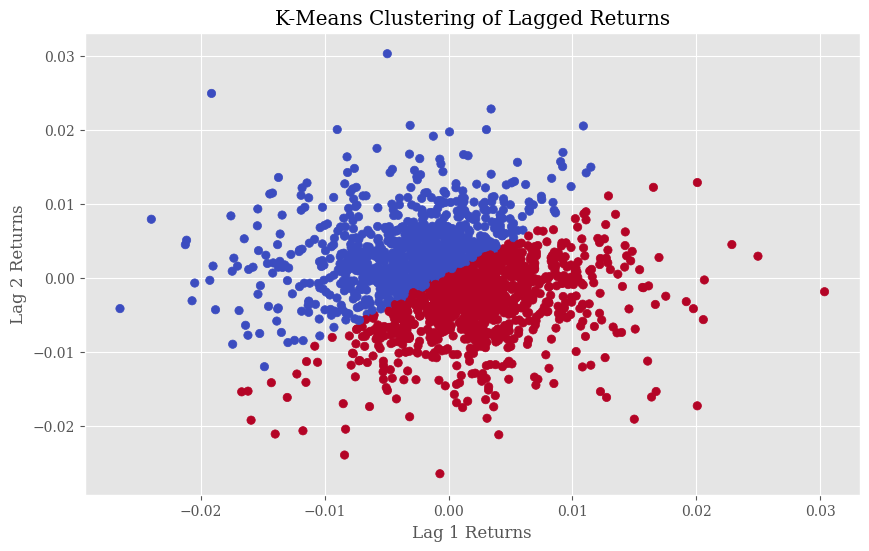

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize the KMeans model with 2 clusters
model = KMeans(n_clusters=2, random_state=0)

# Fit the model on the lagged returns features
model.fit(data[cols])

# Predict the cluster positions
data['pos_clus'] = model.predict(data[cols])

# Map cluster labels to trading positions (+1, -1)
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)

# Display the cluster positions
print(data['pos_clus'].values)

# Visualize the two clusters
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1], c=data['pos_clus'], cmap='coolwarm')
plt.title('K-Means Clustering of Lagged Returns')
plt.xlabel('Lag 1 Returns')
plt.ylabel('Lag 2 Returns')
plt.grid(True)
plt.show()


#Admittedly, this approach is quite arbitrary in this context—after all, how should the
#algorithm know what one is looking for? However, the resulting trading strategy
#shows a slight outperformance at the end compared to the benchmark passive invest‐
#ment. It is noteworthy that no guidance (supervision) is given and
#that the hit ratio—i.e., the number of correct predictions in relationship to all predic‐
#tions made—is less than 50%:

returns       0.803367
strat_clus    0.711538
dtype: float64
False    1005
True      960
Name: count, dtype: int64


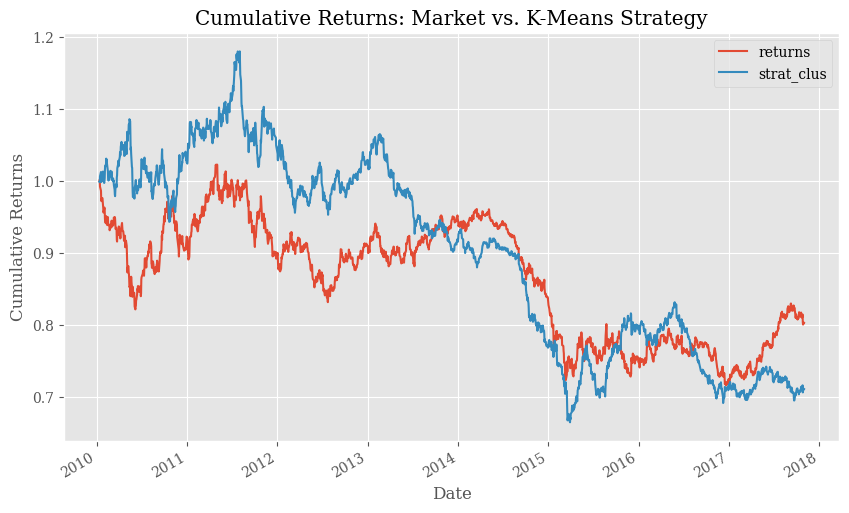

In [80]:
# Calculate the strategy returns for the cluster-based positions
data['strat_clus'] = data['pos_clus'] * data['returns']

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance = data[['returns', 'strat_clus']].sum().apply(np.exp)
print(performance)

# Compare the predicted direction from clustering with the actual direction
accuracy_clus = (data['direction'] == data['pos_clus']).value_counts()
print(accuracy_clus)

# Plot the cumulative sum of returns and cluster strategy returns
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. K-Means Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Frequency Approach
#Beyond more sophisticated algorithms and techniques, one might come up with the
#idea of just implementing a frequency approach to predict directional movements in
#financial markets. To this end, one might transform the two real-valued features to
#binary ones and assess the probability of an upward and a downward movement,
#respectively, from the historical observations of such movements, given the four pos‐
#sible combinations for the two binary features ((0, 0), (0, 1), (1, 0), (1, 1)).
#Making use of the data analysis capabilities of pandas, such an approach is relatively
#easy to implement:

In [84]:
# Frequency Approach
# Transform real-valued features to binary ones and assess the probability of movements

def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

# Create binary features using the bins
create_bins(data)

# Display the first few rows of the binary features along with the direction
print(data[cols_bin + ['direction']].head())

# Group by the binary features and direction, then count the occurrences
grouped = data.groupby(cols_bin + ['direction']).size()
print(grouped)

# Unstack the grouped data to create a contingency table
res = grouped.unstack(fill_value=0)
print(res)

# Function to highlight the maximum values in each row
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function to the contingency table
styled_res = res.style.apply(highlight_max, axis=1)
styled_res


            lag_1_bin  lag_2_bin  direction
Date                                       
2010-01-13          0          1          1
2010-01-14          1          0         -1
2010-01-15          0          1         -1
2010-01-19          0          0         -1
2010-01-20          0          0         -1
lag_1_bin  lag_2_bin  direction
0          0          -1           221
                       0             4
                       1           236
           1          -1           240
                       1           267
1          0          -1           249
                       0             1
                       1           257
           1          -1           258
                       0             4
                       1           228
dtype: int64
direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          221   4  236
          1          240   0  267
1         0          249   1  257
          1          258   4  228


True     1018
False     947
Name: count, dtype: int64
returns       0.803367
strat_freq    1.078618
dtype: float64


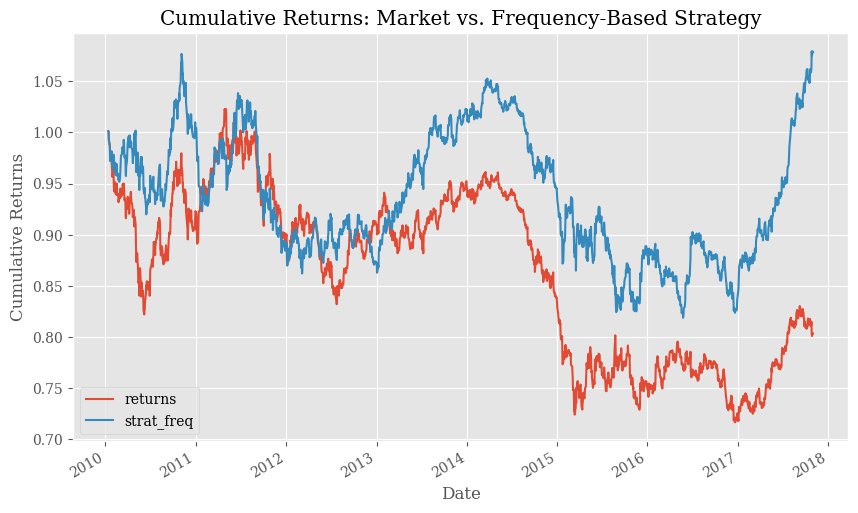

In [86]:
# Determine positions based on the frequency of feature value combinations
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

# Compare the frequency-based positions with the actual direction
accuracy_freq = (data['direction'] == data['pos_freq']).value_counts()
print(accuracy_freq)

# Calculate the strategy returns for the frequency-based positions
data['strat_freq'] = data['pos_freq'] * data['returns']

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_freq = data[['returns', 'strat_freq']].sum().apply(np.exp)
print(performance_freq)

# Plot the cumulative sum of returns and frequency-based strategy returns
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Frequency-Based Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Classification

#With that background and the examples from pre‐
#vious sections, the application of the logistic regression, Gaussian Naive Bayes, and
#support vector machine approaches is as straightforward as applying them to smaller
#sample data sets.


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the classification models
models = {
    'log_reg': LogisticRegression(),
    'gnb': GaussianNB(),
    'svc': SVC(probability=True)
}

# Function to fit all models to the data
def fit_models(data):
    global models
    mfit = {model: models[model].fit(data[cols_bin], data['direction']) for model in models.keys()}

# Fit the models
fit_models(data)

# Function to derive position values from the fitted models
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

# Derive positions
derive_positions(data)

# Display the first few rows to verify
print(data[['pos_log_reg', 'pos_gnb', 'pos_svc']].head())


            pos_log_reg  pos_gnb  pos_svc
Date                                     
2010-01-13            1        1        1
2010-01-14           -1       -1        1
2010-01-15            1        1        1
2010-01-19            1        1        1
2010-01-20            1        1        1


In [91]:
#Second, the vectorized backtesting of the resulting trading strategies.

returns          0.803367
strat_freq       1.078618
strat_log_reg    1.310250
strat_gnb        1.310250
strat_svc        1.078618
dtype: float64


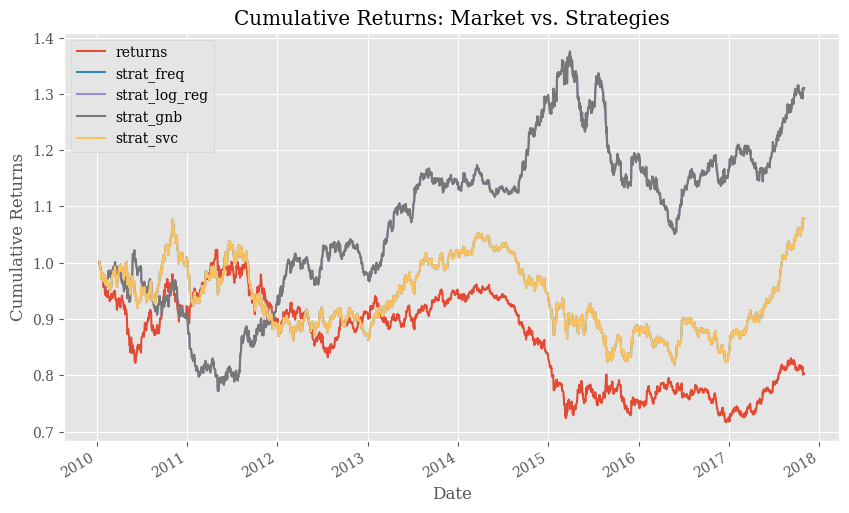

In [94]:
# Function to evaluate strategies by calculating their returns
def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

# Evaluate the strategies
evaluate_strats(data)

# Add the frequency-based strategy to the selection
sel.insert(1, 'strat_freq')

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_strats = data[sel].sum().apply(np.exp)
print(performance_strats)

# Plot the cumulative sum of returns and strategy returns
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Five Binary Features
#In an attempt to improve the strategies’ performance, the following code works with
#five binary lags instead of two. In particular, the performance of the SVM-based
#strategy is significantly improved. On the other hand, the performance of the LR- and GNB-based strategies is worse:

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']
            lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Date                                                             
2010-01-12          1          1          0          1          0
2010-01-13          0          1          1          0          1
2010-01-14          1          0          1          1          0
2010-01-15          0          1          0          1          1
2010-01-19          0          0          1          0          1
returns          0.802315
strat_log_reg    1.124849
strat_gnb        1.124849
strat_svc        2.650562
dtype: float64


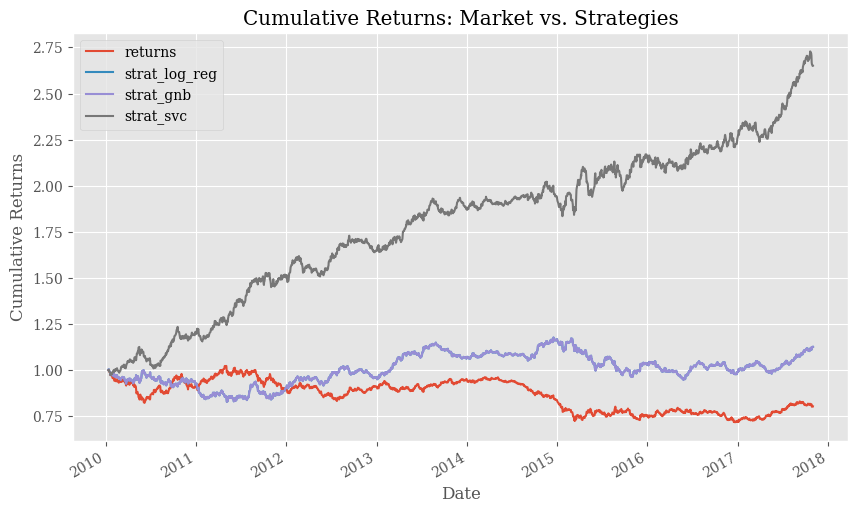

In [98]:
# Reload the raw data and preprocess it
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data['direction'] = np.sign(data['returns'])
data.dropna(inplace=True)

# Define the number of lags
lags = 5

# Create lagged features
create_lags(data)
data.dropna(inplace=True)

# Create binary features
create_bins(data)
print(cols_bin)

# Display the first few rows of the binary features
print(data[cols_bin].head())

# Drop rows with NaN values
data.dropna(inplace=True)

# Fit the models
fit_models(data)

# Derive positions
derive_positions(data)

# Evaluate the strategies
evaluate_strats(data)

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_strats = data[sel].sum().apply(np.exp)
print(performance_strats)

# Plot the cumulative sum of returns and strategy returns
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Five Digitized Features
#Finally, the following code uses the first and second moment of the historical log
#returns to digitize the features data, allowing for more possible feature value combi‐
#nations. This improves the performance of all classification algorithms used, but for
#SVM the improvement is again most pronounced

[-0.006138954541842338, -0.00011203142095872083, 0.005914891699924897]
            lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Date                                                             
2010-01-12          3          3          0          2          1
2010-01-13          1          3          3          0          2
2010-01-14          2          1          3          3          0
2010-01-15          1          2          1          3          3
2010-01-19          0          1          2          1          3
returns          0.802315
strat_log_reg    1.290282
strat_gnb        1.341964
strat_svc        5.877609
dtype: float64


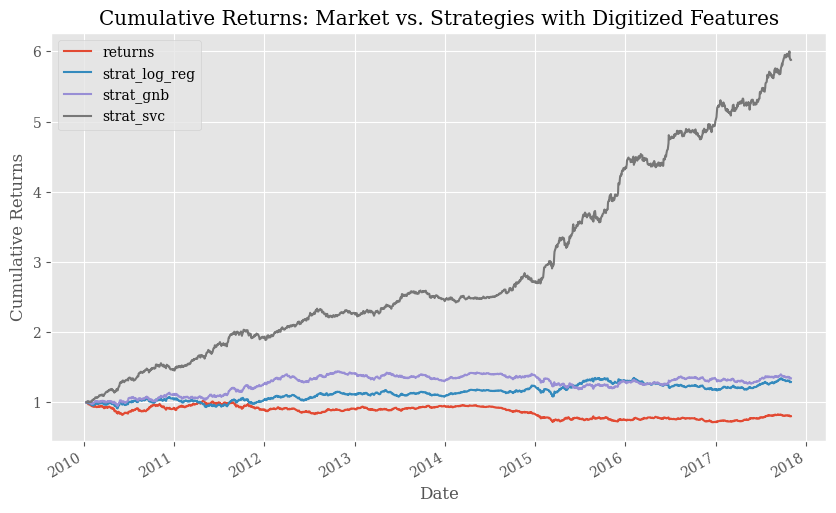

In [102]:
# Calculate the mean and standard deviation of the returns
mu = data['returns'].mean()
v = data['returns'].std()

# Define bins using the first and second moment of the historical log returns
bins = [mu - v, mu, mu + v]
print(bins)

# Create binary features using the new bins
create_bins(data, bins)
print(data[cols_bin].head())

# Fit the models
fit_models(data)

# Derive positions
derive_positions(data)

# Evaluate the strategies
evaluate_strats(data)

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_strats = data[sel].sum().apply(np.exp)
print(performance_strats)

# Plot the cumulative sum of returns and strategy returns
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Strategies with Digitized Features')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Sequential Train-Test Split
#To better judge the performance of the classification algorithms, the code that follows
#implements a sequential train-test split. The idea here is to simulate the situation
#where only data up to a certain point in time is available on which to train an ML
#algorithm. During live trading, the algorithm is then faced with data it has never seen
#before. This is where the algorithm must prove its worth. In this particular case, all
#classification algorithms outperform—under the simplified assumptions from before the passive benchmark investment, 
#but only the GNB and LR algorithms achieve a positive absolute performance

returns          0.851979
strat_log_reg    0.943480
strat_gnb        0.911414
strat_svc        0.919531
dtype: float64


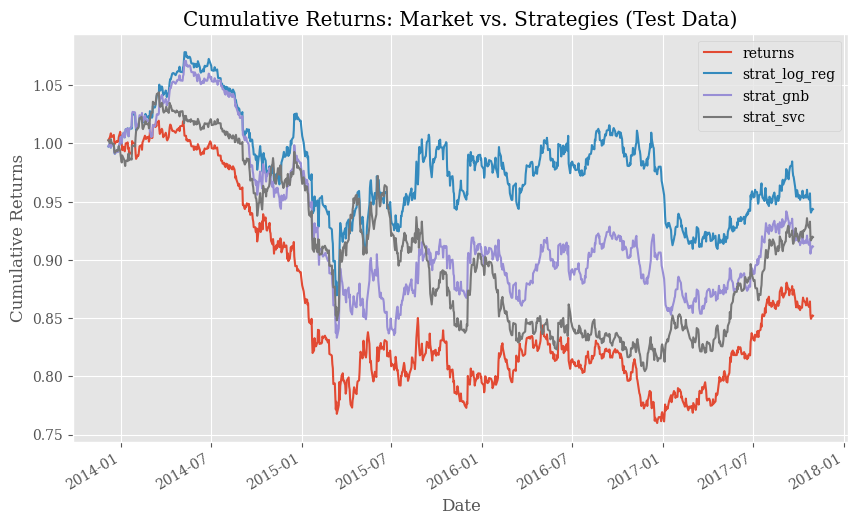

In [106]:
# Define the split point (50% of the data)
split = int(len(data) * 0.5)

# Split the data into training and test sets
train = data.iloc[:split].copy()
test = data.iloc[split:].copy()

# Fit the models on the training data
fit_models(train)

# Derive positions on the test data
derive_positions(test)

# Evaluate the strategies on the test data
evaluate_strats(test)

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_test = test[sel].sum().apply(np.exp)
print(performance_test)

# Plot the cumulative sum of returns and strategy returns on the test data
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Strategies (Test Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Randomized train test split
#The classification algorithms are trained and tested on binary or digitized features data, assuming that the patterns' predictive power persists over time. This approach aims to achieve a better-than-50% hit ratio in predicting future market movements. To validate this assumption, a randomized train-test split is employed, breaking up the temporal sequence of the data. This method tests the performance of the classification algorithms out-of-sample, emulating real-world trading conditions where algorithms continuously encounter new data. By training and testing on different random subsets, this approach ensures that the models generalize well and are robust against varying market conditions.

            lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Date                                                             
2010-01-12          3          3          0          2          1
2010-01-13          1          3          3          0          2
2010-01-14          2          1          3          3          0
2010-01-15          1          2          1          3          3
2010-01-20          1          0          1          2          1
returns          0.847855
strat_log_reg    0.981150
strat_gnb        1.102309
strat_svc        0.948384
dtype: float64


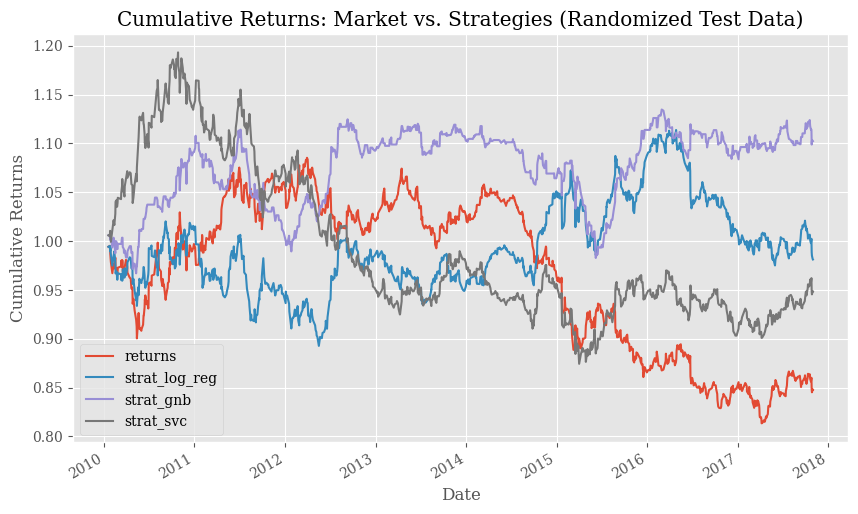

In [110]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Perform a randomized train-test split
train, test = train_test_split(data, test_size=0.5, shuffle=True, random_state=100)

# Ensure the train and test data are sorted by index
train = train.copy().sort_index()
test = test.copy().sort_index()

# Display the first few rows of the binary features in the training set
print(train[cols_bin].head())

# Fit the models on the training data
fit_models(train)

# Derive positions on the test data
derive_positions(test)

# Evaluate the strategies on the test data
evaluate_strats(test)

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_test = test[sel].sum().apply(np.exp)
print(performance_test)

# Plot the cumulative sum of returns and strategy returns on the test data
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. Strategies (Randomized Test Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


#Deep neural networks (DNNs) aim to emulate the functioning of the human brain by leveraging multiple layers to learn complex relationships within data. They consist of an input layer representing the features, an output layer representing the labels, and multiple hidden layers that enable the network to capture intricate patterns. The depth provided by these hidden layers allows DNNs to excel in various problem types, offering improved performance over traditional shallow networks by learning hierarchical feature representations that better capture the underlying structure of the data.

CPU times: user 53.8 s, sys: 4.38 s, total: 58.2 s
Wall time: 5.84 s
returns          0.802315
strat_dnn_sk    50.088025
dtype: float64


/Users/riteshgaire/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


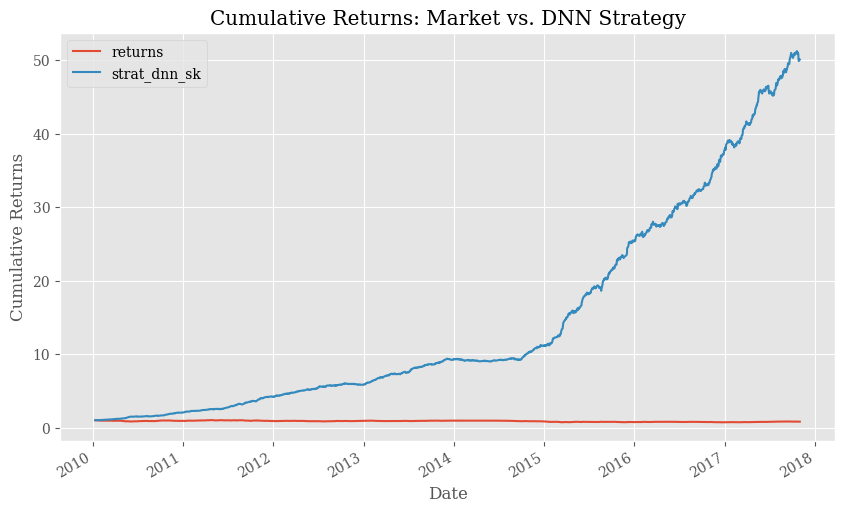

In [116]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Ensure the data DataFrame is defined and populated
# Assuming data, cols_bin, and necessary preprocessing steps are done previously

# Initialize the MLPClassifier model
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [250], random_state=1)

# Fit the model on the digitized features and the direction
%time model.fit(data[cols_bin], data['direction'])

# Predict the positions using the trained model
data['pos_dnn_sk'] = model.predict(data[cols_bin])

# Calculate the strategy returns for the DNN-based positions
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_dnn = data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)
print(performance_dnn)

# Plot the cumulative sum of returns and DNN strategy returns
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. DNN Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


CPU times: user 6min 55s, sys: 39.9 s, total: 7min 35s
Wall time: 44.5 s
returns         0.847855
strat_dnn_sk    1.024681
dtype: float64


/Users/riteshgaire/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


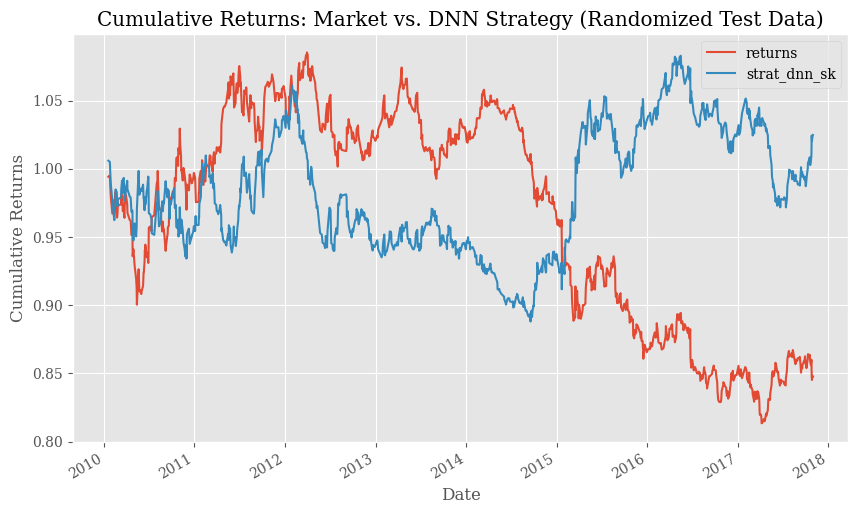

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Perform a randomized train-test split
train, test = train_test_split(data, test_size=0.5, random_state=100)

# Ensure the train and test data are sorted by index
train = train.copy().sort_index()
test = test.copy().sort_index()

# Initialize the MLPClassifier model with increased number of hidden layers and units
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500, hidden_layer_sizes=3 * [500], random_state=1)

# Fit the model on the training data
%time model.fit(train[cols_bin], train['direction'])

# Predict the positions using the trained model on the test data
test['pos_dnn_sk'] = model.predict(test[cols_bin])

# Calculate the strategy returns for the DNN-based positions on the test data
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance_test_dnn = test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)
print(performance_test_dnn)

# Plot the cumulative sum of returns and DNN strategy returns on the test data
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. DNN Strategy (Randomized Test Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()


CPU times: user 6min 33s, sys: 42.3 s, total: 7min 15s
Wall time: 41.7 s
Epoch 1/50


/Users/riteshgaire/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/riteshgaire/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5036 - loss: 0.7027 - val_accuracy: 0.4670 - val_loss: 0.7343
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.7044 - val_accuracy: 0.5025 - val_loss: 0.6919
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5422 - loss: 0.6880 - val_accuracy: 0.4619 - val_loss: 0.7062
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5012 - loss: 0.6968 - val_accuracy: 0.4670 - val_loss: 0.7038
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5355 - loss: 0.6865 - val_accuracy: 0.5533 - val_loss: 0.6946
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5422 - loss: 0.6862 - val_accuracy: 0.5076 - val_loss: 0.7001
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5625 - loss: 0.6805 - val_accuracy: 0.5279 - val_loss: 0.7008
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5574 - loss: 0.6831 - val_accuracy: 0.5381 - val_loss: 0.6963
Epoch 9/50
7/7 ━━

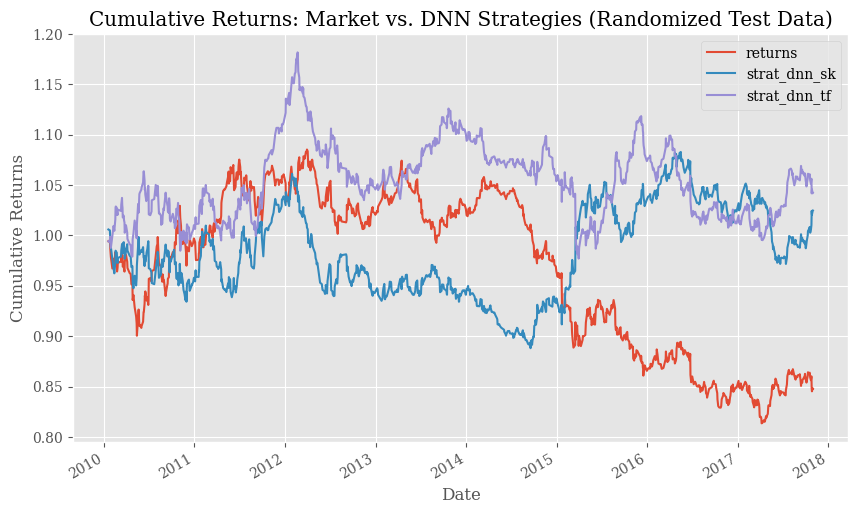

In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Perform a randomized train-test split
train, test = train_test_split(data, test_size=0.5, random_state=100)

# Ensure the train and test data are sorted by index
train = train.copy().sort_index()
test = test.copy().sort_index()

# Initialize the MLPClassifier model with increased number of hidden layers and units
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500, hidden_layer_sizes=3 * [500], random_state=1)

# Fit the MLP model on the training data
%time mlp_model.fit(train[cols_bin], train['direction'])

# Predict the positions using the trained MLP model on the test data
test['pos_dnn_sk'] = mlp_model.predict(test[cols_bin])

# Calculate the strategy returns for the DNN-based positions on the test data
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

# Create a Keras model for the DNN
def create_keras_model(input_shape):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu', input_shape=input_shape),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare the input data for the Keras model
train_x = train[cols_bin].values
train_y = train['direction'].apply(lambda x: 1 if x > 0 else 0).values
test_x = test[cols_bin].values
test_y = test['direction'].apply(lambda x: 1 if x > 0 else 0).values

# Initialize the Keras model
keras_model = create_keras_model((train_x.shape[1],))

# Train the Keras model
%time keras_model.fit(train_x, train_y, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

# Predict positions using the trained Keras model
pred = keras_model.predict(test_x)
test['pos_dnn_tf'] = np.where(pred > 0.5, 1, -1)

# Calculate the strategy returns for the TensorFlow DNN-based positions on the test data
test['strat_dnn_tf'] = test['pos_dnn_tf'] * test['returns']

# Sum the returns and strategy returns, then apply the exponential function to get the cumulative performance
performance = test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].sum().apply(np.exp)
print(performance)

# Plot the cumulative sum of returns and strategy returns on the test data
test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.title('Cumulative Returns: Market vs. DNN Strategies (Randomized Test Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()




#This section algorithmic trading strategies and evaluates their performance using vectorized backtesting. It begins with a simple trading strategy based on two moving averages, a method long utilized in financial markets. This strategy exemplifies vectorized backtesting, leveraging the powerful vectorization capabilities of NumPy and pandas for efficient data analysis. The chapter also employs OLS regression to explore the random walk hypothesis using real financial time series, establishing a benchmark for any trading strategy. The main focus, however, is the application of machine learning algorithms, introduced earlier in "Machine Learning". Various classification algorithms are applied to lagged log returns data, chosen for its convenience and simplicity despite its limitations. The analysis is carried out under several simplifying assumptions, emphasizing the technical implementation of machine learning in trading rather than exhaustive market conditions. This approach demonstrates the potential of machine learning to enhance trading strategies, albeit under controlled and simplified scenarios.